# Recolección de datos de Telegram


In [61]:
import json
import pandas as pd

# import from modules
from urllib.parse import urlparse

# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# seaborn
import seaborn as sns

JSON files por canal:


*   Channel metadata
*   Channel messages




In [51]:
# Defino el canal de Telegram
TELEGRAM_CHANNEL_NAME = 'PLANDEMIA_MUNDIAL_COVID'

In [65]:

#%cd telegram-tracker

#!python3 main.py --telegram-channel {TELEGRAM_CHANNEL_NAME} --output telegram/

#%cd ..

/home/dante/Escritorio/GitHub/Tesis/data-collecting/telegram-data/telegram-tracker

Init program at Fri Nov  3 17:54:05 2023


> Authorized!

> Collecting data from Telegram Channel -> PLANDEMIA_MUNDIAL_COVID
> ...

> Writing channel data...
> done.

> Writing posts data...
> done.


End program at Fri Nov  3 17:59:28 2023


/home/dante/Escritorio/GitHub/Tesis/data-collecting/telegram-data


In [66]:
# Define Telegram channel
with open(f'data/{TELEGRAM_CHANNEL_NAME}/{TELEGRAM_CHANNEL_NAME}_messages.json') as f:
    data = json.load(f)
    f.close()

In [67]:
data.keys()

dict_keys(['_', 'pts', 'count', 'messages', 'topics', 'chats', 'users', 'inexact', 'offset_id_offset'])

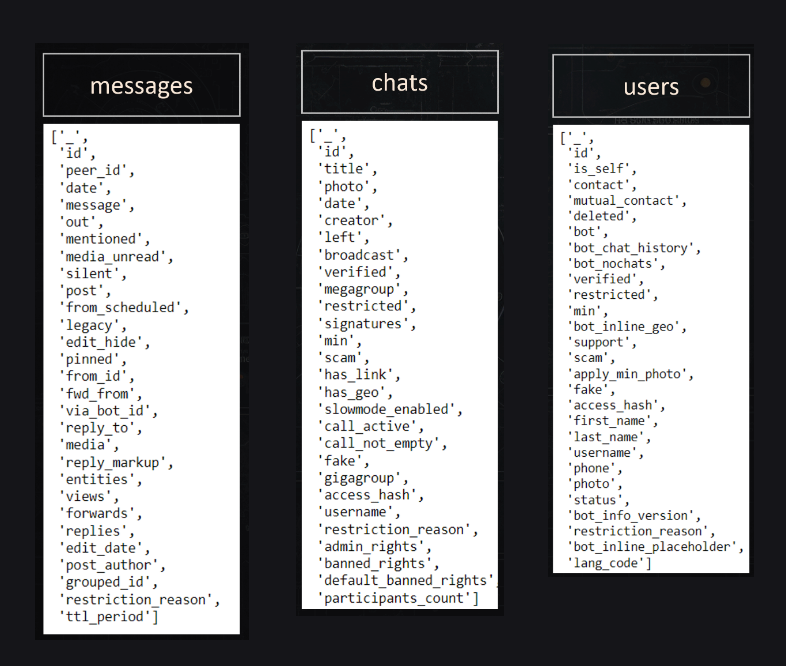

### Armo dataset a partir del Canal


In [68]:
df = pd.DataFrame.from_dict(data['messages'])
df.shape

(17977, 32)

In [69]:
df.head()

,_,id,peer_id,date,message,out,mentioned,media_unread,silent,post,...,views,forwards,replies,edit_date,post_author,grouped_id,reactions,restriction_reason,ttl_period,action
0,Message,18615,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-11-03 00:29:06+00:00,https://www.instagram.com/p/CzKMmH4J2xI/?igshi...,False,False,False,False,True,...,7720.0,60.0,"{'_': 'MessageReplies', 'replies': 14, 'replie...",2023-11-03 00:29:25+00:00,NaN,NaN,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],None,NaN
1,Message,18614,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-11-03 00:19:44+00:00,Investigadores canadienses encontraron un vínc...,False,False,False,False,True,...,7856.0,97.0,"{'_': 'MessageReplies', 'replies': 3, 'replies...",2023-11-03 00:20:16+00:00,NaN,NaN,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],None,NaN
2,Message,18613,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-11-02 23:09:03+00:00,https://www-dailymail-co-uk.translate.goog/sci...,False,False,False,False,True,...,7346.0,58.0,"{'_': 'MessageReplies', 'replies': 11, 'replie...",2023-11-02 23:19:05+00:00,NaN,NaN,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],None,NaN
3,Message,18612,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-11-02 22:58:08+00:00,https://www.rtve.es/noticias/20231025/leqvio-f...,False,False,False,False,True,...,7442.0,75.0,"{'_': 'MessageReplies', 'replies': 25, 'replie...",2023-11-03 01:34:30+00:00,NaN,NaN,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],None,NaN
4,Message,18611,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-11-02 21:12:45+00:00,¡Tremendo estudio!\n\nMortalidad asociada a la...,False,False,False,False,True,...,7642.0,79.0,"{'_': 'MessageReplies', 'replies': 12, 'replie...",2023-11-02 21:15:51+00:00,NaN,NaN,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],None,NaN


In [70]:
users = pd.DataFrame.from_dict(data['users'])
users.shape

(14378, 33)

In [71]:
users.head()

,_,id,is_self,contact,mutual_contact,deleted,bot,bot_chat_history,bot_nochats,verified,...,username,phone,photo,status,bot_info_version,restriction_reason,bot_inline_placeholder,lang_code,emoji_status,usernames
0,User,136817688,False,False,False,False,True,False,False,False,...,Channel_Bot,None,"{'_': 'UserProfilePhoto', 'photo_id': 58762749...",None,4.0,[],None,None,None,[]
1,User,1615615266,False,False,False,False,False,False,False,False,...,None,None,None,{'_': 'UserStatusRecently'},NaN,[],None,None,None,[]
2,User,6241557915,False,False,False,False,False,False,False,False,...,None,None,None,{'_': 'UserStatusRecently'},NaN,[],None,None,None,[]
3,User,1115379914,False,False,False,False,False,False,False,False,...,None,None,None,{'_': 'UserStatusRecently'},NaN,[],None,None,None,[]
4,User,6860667782,False,False,False,False,False,False,False,False,...,None,None,None,{'_': 'UserStatusRecently'},NaN,[],None,None,None,[]


In [72]:
chats = pd.DataFrame.from_dict(data['chats'])
chats.shape

(30, 34)

In [73]:
chats.head()

,_,id,title,photo,date,creator,left,broadcast,verified,megagroup,...,forum,access_hash,username,restriction_reason,admin_rights,banned_rights,default_banned_rights,participants_count,usernames,until_date
0,Channel,1426315759,PLANDEMIA MUNDIAL COVID 2021 🧡,"{'_': 'ChatPhoto', 'photo_id': 509171278102302...",2023-10-25 15:03:26+00:00,False,False,True,False,False,...,False,-502644747757669018,PLANDEMIA_MUNDIAL_COVID,[],NaN,NaN,None,NaN,[],NaN
1,Channel,1321647218,Adventista Hoy,"{'_': 'ChatPhoto', 'photo_id': 589099008009133...",2021-02-25 06:11:31+00:00,False,False,True,False,False,...,False,-8361937760973556573,adventistahoy,[],NaN,NaN,None,NaN,[],NaN
2,ChannelForbidden,1654348946,Bully Anonymus,NaN,NaN,NaN,NaN,True,NaN,False,...,NaN,-8911230061692547953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Channel,1317143701,PLANDEMIA MUNDIAL COVID 2021,"{'_': 'ChatPhoto', 'photo_id': 509594303604678...",2021-01-31 23:53:08+00:00,False,False,False,False,True,...,False,6437375439261459780,PlandemiaMundialCovid2021,[],NaN,NaN,"{'_': 'ChatBannedRights', 'until_date': '2038-...",NaN,[],NaN
4,Channel,1111547079,NO LO VERÁS EN LA TV by Ovc25 🗞📰📲,"{'_': 'ChatPhoto', 'photo_id': 595621993025907...",2022-02-26 03:21:08+00:00,False,False,True,False,False,...,False,1693002502296714423,apagalatvya,[],NaN,NaN,None,NaN,[],NaN


### Preparación de los Datos

Comprender los matices temporales de los datos es clave, especialmente cuando se trabaja con plataformas dinámicas como Telegram. La función timestamp_attrs:

* Procesa fechas: convierte la columna de fecha a un formato de fecha y
hora adecuado y la ajusta a la zona horaria determinada.
Extrae atributos: la función luego recopila atributos de marca de tiempo:
* Marca de tiempo estándar: una marca de tiempo completa que incluye la fecha y la hora.
* Cadena de fecha: solo la fecha en formato 'AAAA-MM-DD'.
* Nombres de mes y día: nombres textuales para el mes y el día.
Componentes de tiempo: esto incluye el tiempo completo, así como horas, minutos y segundos individuales.

In [74]:
def timestamp_attrs(d, timezone, col='date'):
    '''
    '''
    # process dates
    t = pd.to_datetime(
        d[col],
        infer_datetime_format=True,
        yearfirst=True
    ).apply(lambda x: x.tz_convert(timezone))

    # timestamp sttributes
    d[f'{col}_timestamp'] = t.dt.strftime('%Y-%m-%d %H:%M:%S')
    d[f'{col}_string'] = t.dt.strftime('%Y-%m-%d')
    d[f'{col}_month_name'] = t.dt.month_name()
    d[f'{col}_day_name'] = t.dt.day_name()
    d[f'{col}_time_hour'] = t.dt.strftime('%H:%M:%S')
    d[f'{col}_hour'] = t.dt.hour
    d[f'{col}_minute'] = t.dt.minute
    d[f'{col}_second'] = t.dt.second

    return d

In [75]:
timezone = 'America/Buenos_Aires'

# Get date attributes
df = timestamp_attrs(df, timezone)
df.shape

(17977, 40)

In [77]:
df.head()

,_,id,peer_id,date,message,out,mentioned,media_unread,silent,post,...,ttl_period,action,date_timestamp,date_string,date_month_name,date_day_name,date_time_hour,date_hour,date_minute,date_second
0,Message,18615,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-11-03 00:29:06+00:00,https://www.instagram.com/p/CzKMmH4J2xI/?igshi...,False,False,False,False,True,...,None,NaN,2023-11-02 21:29:06,2023-11-02,November,Thursday,21:29:06,21,29,6
1,Message,18614,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-11-03 00:19:44+00:00,Investigadores canadienses encontraron un vínc...,False,False,False,False,True,...,None,NaN,2023-11-02 21:19:44,2023-11-02,November,Thursday,21:19:44,21,19,44
2,Message,18613,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-11-02 23:09:03+00:00,https://www-dailymail-co-uk.translate.goog/sci...,False,False,False,False,True,...,None,NaN,2023-11-02 20:09:03,2023-11-02,November,Thursday,20:09:03,20,9,3
3,Message,18612,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-11-02 22:58:08+00:00,https://www.rtve.es/noticias/20231025/leqvio-f...,False,False,False,False,True,...,None,NaN,2023-11-02 19:58:08,2023-11-02,November,Thursday,19:58:08,19,58,8
4,Message,18611,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-11-02 21:12:45+00:00,¡Tremendo estudio!\n\nMortalidad asociada a la...,False,False,False,False,True,...,None,NaN,2023-11-02 18:12:45,2023-11-02,November,Thursday,18:12:45,18,12,45


In [78]:
df.columns.values

array(['_', 'id', 'peer_id', 'date', 'message', 'out', 'mentioned',
       'media_unread', 'silent', 'post', 'from_scheduled', 'legacy',
       'edit_hide', 'pinned', 'noforwards', 'from_id', 'fwd_from',
       'via_bot_id', 'reply_to', 'media', 'reply_markup', 'entities',
       'views', 'forwards', 'replies', 'edit_date', 'post_author',
       'grouped_id', 'reactions', 'restriction_reason', 'ttl_period',
       'action', 'date_timestamp', 'date_string', 'date_month_name',
       'date_day_name', 'date_time_hour', 'date_hour', 'date_minute',
       'date_second'], dtype=object)

In [79]:
# Ordeno valores por tiempo
df = df.sort_values(by='date_timestamp').copy()

# start date
print (df['date_timestamp'].iloc[0])

# end date
print (df['date_timestamp'].iloc[-1])

2020-11-28 11:05:36
2023-11-02 21:29:06


In [80]:
#Comparo la fecha de creacion del canal con el primer mensaje
obj = [i for i in data['chats'] if 'username' in i.keys() and i['username'] == TELEGRAM_CHANNEL_NAME]

# channel creation date
print (obj[0]['date'])

2023-10-25 15:03:26+00:00


Comenzamos ordenando el marco de datos según la columna 'date_timestamp' para asegurarnos de que nuestros datos estén en orden cronológico. A continuación, agrupamos los datos ordenados por 'cadena_fecha' (que representa cada día único) y agregamos la suma de los valores del 'contador' para cada grupo. Básicamente, esto nos da el recuento de mensajes para cada día único.

In [81]:
df['counter'] = 1

In [82]:
t_data = df.sort_values(by='date_timestamp').groupby('date_string').agg(
    {
        'counter': 'sum'
    }
)

# Index Conversion. This ensures that the date strings are recognized as actual datetime objects.
t_data.index = pd.DatetimeIndex(t_data.index)

# Data sample size
t_data.shape

(1019, 1)

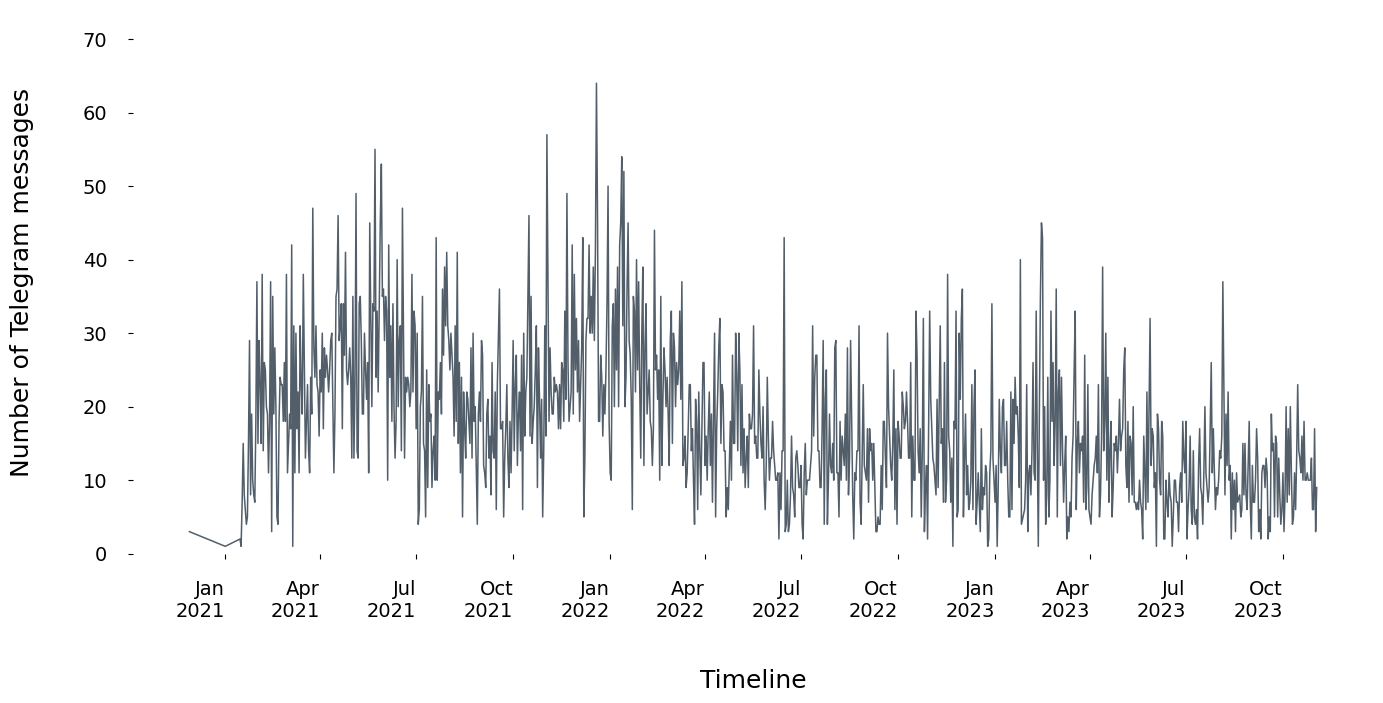

In [83]:
# plot
dev_color = '#000000'
fig, ax = plt.subplots(figsize=(16,8))
t_data.plot(y='counter', kind='line', linewidth=1.1, ax=ax, alpha=0.8, color='#273746',
            legend=False, ylim=(0, t_data['counter'].max() + 10))

# set ticks every hour
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.tick_params(direction='out', color=dev_color, labelsize=14, rotation=0,
               pad=15, labelcolor=dev_color)

# labels
ax.set_ylabel('Number of Telegram messages', labelpad=35, fontsize=18, color=dev_color)
ax.set_xlabel('Timeline', labelpad=35, fontsize=18, color=dev_color)

plt.box(False);


### Procesamiento y agregado de features de interacciones

Manejo de datos nulos
* fillna(0) remplazo los NaN (Not a Number) con ceros. NaN values suelen indicar data faltante.
* astype(int) convierte los valores de la columna en enteros.

In [84]:
engagements_cols = ['views', 'forwards', 'replies']
for c in engagements_cols:
    df[c] = df[c].fillna(0)

In [85]:
arr = df.iloc[0]
arr

_                                                        MessageService
id                                                                    1
peer_id                  {'_': 'PeerChannel', 'channel_id': 1426315759}
date                                          2020-11-28 14:05:36+00:00
message                                                             NaN
out                                                               False
mentioned                                                         False
media_unread                                                      False
silent                                                            False
post                                                               True
from_scheduled                                                      NaN
legacy                                                            False
edit_hide                                                           NaN
pinned                                                          

In [86]:
replies = []
for replie in df['replies']:
  if replie != 0:
    replies.append(replie['replies'])
  else:
    replies.append(0)
# list(map(lambda replie: replie['replies'] if replie != 0 else 0, df['replies']))

Se agrega una nueva columna denominada 'total_engagements' al marco de datos df. Los valores de esta columna son la suma de las columnas "vistas", "reenvíos" y "respuestas" de cada fila.

In [87]:
df['total_engagements'] = df['views'] + df['forwards'] + replies
df['total_engagements'].sum()

343089274.0

### Grafico Repercusiones

In [88]:
t_data_engagements = df.sort_values(by='date_timestamp').groupby('date_string').agg(
    {
        'total_engagements': 'sum'
    }
)

# Index Conversion. This ensures that the date strings are recognized as actual datetime objects.
t_data_engagements.index = pd.DatetimeIndex(t_data_engagements.index)

# Data sample size
t_data_engagements.shape

(1019, 1)

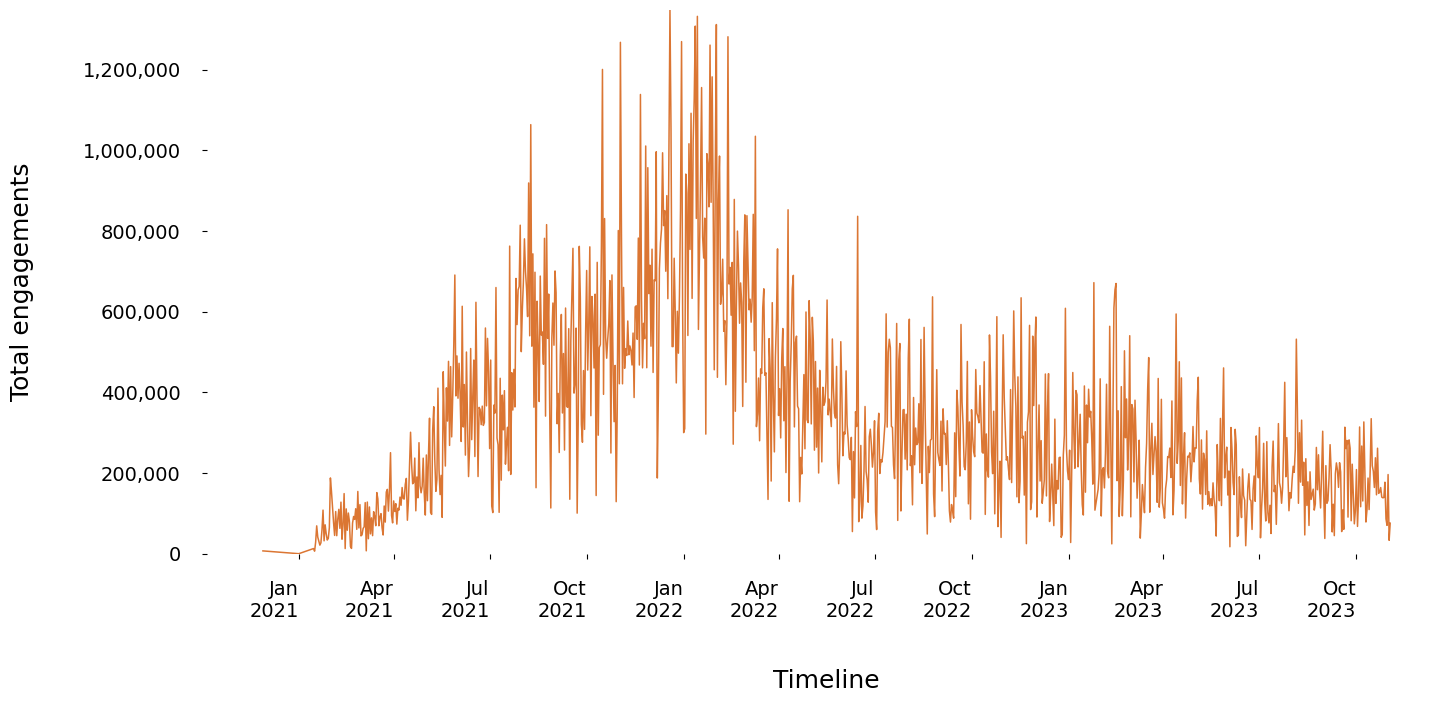

In [89]:
# plot
dev_color = '#000000'
fig, ax = plt.subplots(figsize=(16,8))
t_data_engagements.plot(y='total_engagements', kind='line', linewidth=1.1, ax=ax, alpha=0.8, color='#D35400',
                        legend=False, ylim=(0, t_data_engagements['total_engagements'].max() + 100))

# set ticks every hour
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.tick_params(direction='out', color=dev_color, labelsize=14, rotation=0,
               pad=15, labelcolor=dev_color)

# labels
ax.set_ylabel('Total engagements', labelpad=35, fontsize=18, color=dev_color)
ax.set_xlabel('Timeline', labelpad=35, fontsize=18, color=dev_color)

plt.box(False);

### Análisis de links externos de los mensajes

Al utilizar la función extract_domain_from_url, se puede obtener fácilmente el nombre de dominio estandarizado de cualquier URL determinada, lo cual es especialmente útil cuando se busca analizar o agrupar datos en función de dominios.

In [90]:
# Get URL domains < netloc: network location component >
def extract_domain_from_url(url_value):
    '''
    Extract the domain (netloc) from a given URL.

    Parameters:
    - url_value (str): The full URL from which the domain is to be extracted.

    Returns:
    - str: The domain of the URL without the 'www.' prefix, if present.
    '''
    netloc = urlparse(url_value).netloc
    return netloc.replace('www.', '')

In [91]:
# Initialization

'''
We start by initializing an empty list named urls. This will store the tuples of (url, domain) extracted from the messages.
'''
urls = []

# Iterating Over Messages
for item in data['messages']:

    '''
    We begin a loop to iterate through each item in the messages key of the data dictionary.
    Each item here represents an individual message.
    '''
    # Checking for Media
    if 'media' in item.keys():
        '''
        We check if the current item (or message) contains a key named media.
        If it does, we assign its value to the variable media
        '''
        media = item['media']

        # Validating Media Type
        '''
        We then ensure that the media is not `None` and that it corresponds to the type 'MessageMediaWebPage'.
        '''

        if media != None and media['_'] == 'MessageMediaWebPage':

            # Identifying WebPage Media
            media_type = media['webpage']['_']
            if media_type == 'WebPage':
                '''
                If the above conditions are met, we delve deeper into the media's webpage attribute to retrieve its type,
                which we assign to `media_type`. We then check if this type is 'WebPage'.
                '''

                # Collect urls and domains
                url = media['webpage']['url']
                domain = extract_domain_from_url(url)
                result = (url, domain)
                urls.append(result)

In [92]:
df_urls = pd.DataFrame(
    urls,
    columns=['url', 'domain']
)

### Gráfico dominios mas usados

In [93]:
top_domains = df_urls['domain'].value_counts().head(15)

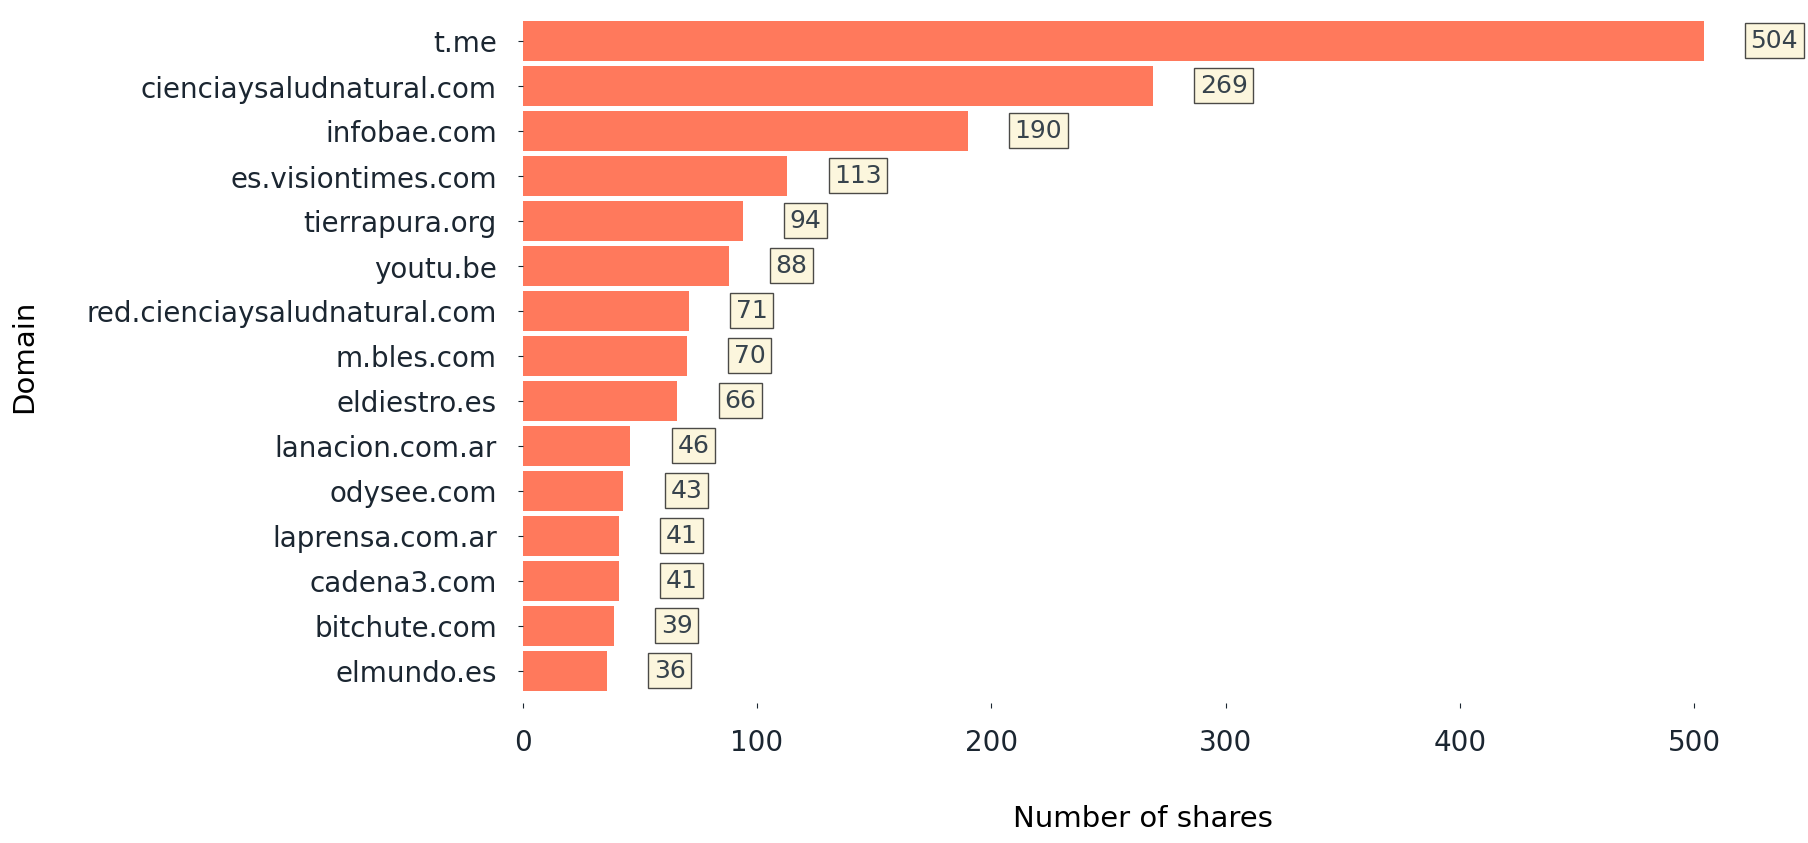

In [94]:
# plot domains
fig, ax = plt.subplots(figsize=(16, 9))

# plot
width = 0.9

top_domains.iloc[::-1] \
    .plot(x='domain', kind='barh', width=width, ax=ax, legend=False, color='#FF5733', alpha=0.8)

# set major ticks format
ax.tick_params(direction='out', color='#1B2631', labelsize=20, rotation=0, pad=15,
               labelcolor='#1B2631')

ax.set_ylabel('Domain', labelpad=35, fontsize=21,)
ax.set_xlabel('Number of shares', labelpad=35, fontsize=21)

# StrMethodFormatter
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

for i, v in enumerate(sorted(top_domains.values)):
    ax.text(v + 20, i - 0.15, '{:,}'.format(v), color='#212F3C',
            fontweight='normal', fontsize=18, alpha=0.9, bbox=dict(facecolor='#FCF3CF', alpha=0.7))

plt.box(False);

### Analizando con OSINTGPT

In [118]:
# import required modules

'''
AI module: OsintGPT
'''
# embeddings
from osintgpt.embeddings import OpenAIEmbeddingGenerator

In [119]:
env_path = 'osintgpt/.env'

In [124]:
# OpenAIEmbeddingGenerator instance
embedding_generator = OpenAIEmbeddingGenerator(env_file_path=env_path)

#### Preprocesando Mensajes

Seleccionaremos mensajes que contengan más de 10 palabras y menos de 50 palabras. Este proceso creará una nueva columna 'text_length' que contiene el recuento de palabras para cada mensaje correspondiente en la columna 'mensaje'.

In [99]:
df['text_length'] = df['message'].apply(lambda x: len(' '.join(x.split()).strip().split()) if str(x) != 'nan' else 0)

In [100]:
messages_dataset = df[
    (df['text_length'] > 10) &
    (df['text_length'] < 50)
].copy()

# data sample
messages_dataset.shape

(8914, 43)

In [101]:
messages_dataset[['message', 'text_length']].head()

,message,text_length
17972,Heli Perez - Agenda 2030… para que entiendan l...,14
17965,INFORMACIÓN IMPORTANTE!!!!\n\nASÍ NOS MIENTEN!...,29
17964,Me.gustaria saber si otras personas han visto ...,11
17962,El Ministerio de Obras Públicas avanza con los...,19
17958,Noruega Muertes por vacuna Pfizer: Australia b...,13


Borramos duplicados

In [102]:
messages_dataset = messages_dataset.drop_duplicates(subset='message').sort_values(by='date').reset_index().copy()
messages_dataset.shape

(8714, 44)

In [103]:
# example
import random
messages_dataset['message'].iloc[random.randint(0, messages_dataset.shape[0])]

'Enorme escándalo en el Reino Unido con el desmantelamiento de una vasta red de pedófilos que incluye a 76 políticos, 43 artistas, 35 periodistas, etc... ¡100.000 niños!\n\nDe esto nadie habla, ningún medio de manipulación masiva y ninguna película de Hollywood\n\nUnite a Plandemia:\nhttps://t.me/PLANDEMIA_MUNDIAL_COVID'

#### Cargando datos de texto en el Embedding Generator

Este segmento de código se centra en preparar e introducir una lista de mensajes en embedding_generator para su posterior procesamiento.

In [125]:
# load text data to embedding generator
text_data = messages_dataset['message'].tolist()
embedding_generator.load_text(text_data)

Con la lista de mensajes en la mano, usamos el método load_text de nuestra instancia embedding_generator. Este método está diseñado para aceptar una lista de textos (en este caso, nuestros mensajes) y prepararlos o procesarlos para el embedding.

In [126]:
print (f'Number of documents -> {len(text_data)}')

Number of documents -> 8714


#### Calculo de costos

En el contexto de modelos como GPT-3.5/4 de OpenAI, los tokens son fragmentos de texto (palabras, partes de palabras o incluso caracteres individuales) que lee el modelo. La cantidad de tokens afecta el tiempo y los costos de procesamiento. El siguiente segmento de código ayuda a estimar los costos relacionados con los tokens para generar incrustaciones para nuestro conjunto de mensajes:

*Contando tokens*

- `embedding_generator.count_tokens()`: Este metodo calcula el total de tokens presentes en los mensajes. 

In [127]:
n_tokens = embedding_generator.count_tokens()
print (f'Number of tokens -> {n_tokens}')

KeyError: 'Could not automatically map 3.5 to a tokeniser. Please use `tiktoken.get_encoding` to explicitly get the tokeniser you expect.'